In [25]:
## Load and Inspect the Data

import pandas as pd

# Load the dataset
df = pd.read_csv("scraped_data.csv")

# Preview the dataset
df.head(100)

# Dataset info
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Part_Name       100 non-null    object 
 1   Material        100 non-null    object 
 2   Dimensions_mm   100 non-null    object 
 3   Quoted_Cost     100 non-null    float64
 4   Cycle_Time_min  100 non-null    float64
 5   Feature_Count   100 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


,Quoted_Cost,Cycle_Time_min,Feature_Count
count,100.000000,100.000000,100.000000
mean,609.878400,513.813500,7.590000
std,408.572943,345.654552,2.818034
min,47.870000,65.710000,3.000000
25%,319.207500,244.132500,5.000000
50%,465.705000,408.115000,7.000000
75%,792.397500,708.470000,10.000000
max,1842.100000,1711.640000,12.000000


In [26]:
##  Data Cleaning

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Clean 'Quoted_Cost' if necessary (already numeric in this dataset)
# Convert Dimensions to numeric features
df[['Length', 'Width', 'Height']] = df['Dimensions_mm'].str.split('x', expand=True).astype(float)

# Calculate Volume
df['Volume_mm3'] = df['Length'] * df['Width'] * df['Height']

# Confirm changes
df.head(100)

Missing values:
 Part_Name         0
Material          0
Dimensions_mm     0
Quoted_Cost       0
Cycle_Time_min    0
Feature_Count     0
dtype: int64


,Part_Name,Material,Dimensions_mm,Quoted_Cost,Cycle_Time_min,Feature_Count,Length,Width,Height,Volume_mm3
0,Plastic Flange,Plastic,90x70x55,320.42,398.47,3,90.0,70.0,55.0,346500.0
1,Steel Base,Steel,95x150x30,753.27,598.50,8,95.0,150.0,30.0,427500.0
2,Plastic Mount,Plastic,106x124x53,616.49,905.62,6,106.0,124.0,53.0,696632.0
3,Brass Base,Brass,67x85x48,641.71,369.04,7,67.0,85.0,48.0,273360.0
4,Plastic Flange,Plastic,64x65x49,176.10,295.57,9,64.0,65.0,49.0,203840.0
...,...,...,...,...,...,...,...,...,...,...
95,Aluminum Base,Aluminum,127x69x63,788.59,800.50,9,127.0,69.0,63.0,552069.0
96,Plastic Base,Plastic,43x137x75,340.91,706.92,12,43.0,137.0,75.0,441825.0
97,Brass Housing,Brass,108x54x61,748.04,444.69,5,108.0,54.0,61.0,355752.0
98,Aluminum Flange,Aluminum,143x132x31,808.83,936.25,12,143.0,132.0,31.0,585156.0


In [27]:
##  Feature Engineering

# Cost per mm3
df['Cost_per_mm3'] = df['Quoted_Cost'] / df['Volume_mm3']

# Cost per feature
df['Cost_per_Feature'] = df['Quoted_Cost'] / df['Feature_Count']

# Display new features
df[['Quoted_Cost', 'Volume_mm3', 'Cost_per_mm3', 'Feature_Count', 'Cost_per_Feature']].head()


,Quoted_Cost,Volume_mm3,Cost_per_mm3,Feature_Count,Cost_per_Feature
0,320.42,346500.0,0.000925,3,106.806667
1,753.27,427500.0,0.001762,8,94.158750
2,616.49,696632.0,0.000885,6,102.748333
3,641.71,273360.0,0.002347,7,91.672857
4,176.10,203840.0,0.000864,9,19.566667


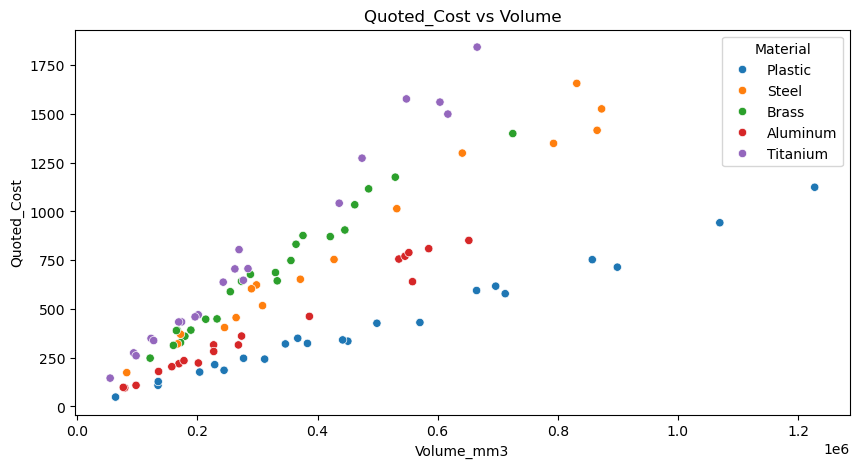

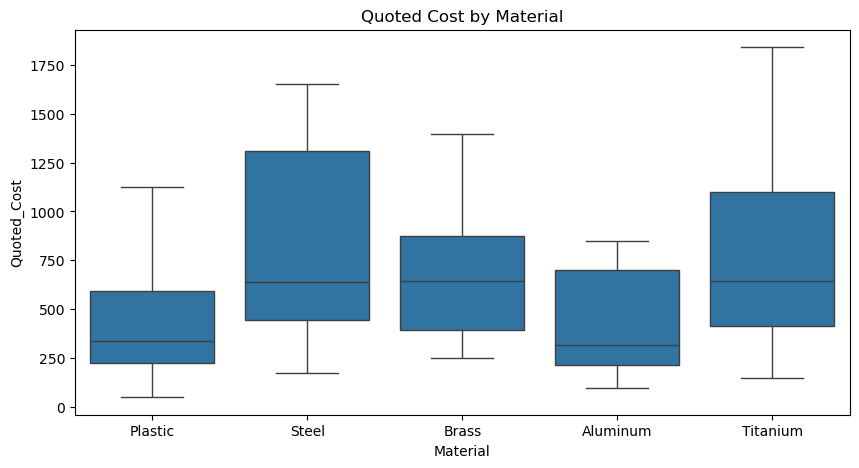

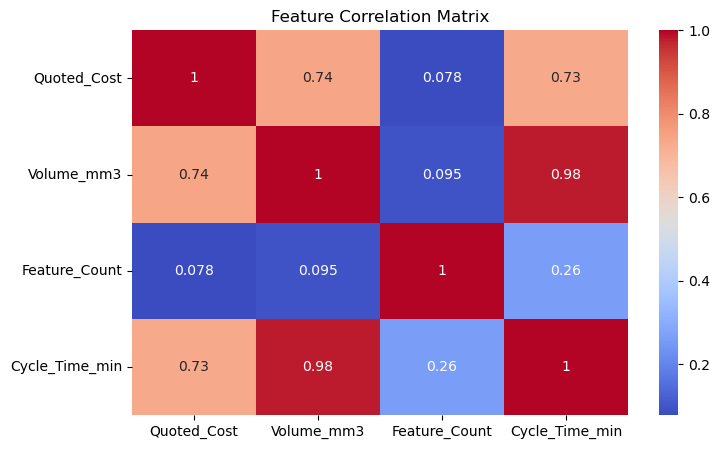

In [28]:
## Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Cost vs Volume
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Volume_mm3', y='Quoted_Cost', hue='Material')
plt.title('Quoted_Cost vs Volume')
plt.show()

# Cost vs Feature Count
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Material', y='Quoted_Cost')
plt.title('Quoted Cost by Material')
plt.show()

# Feature Correlation
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Quoted_Cost', 'Volume_mm3', 'Feature_Count', 'Cycle_Time_min']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Model Evaluation:
Mean Absolute Error (MAE): 157.37326499999995
Root Mean Squared Error (RMSE): 233.88207018903438


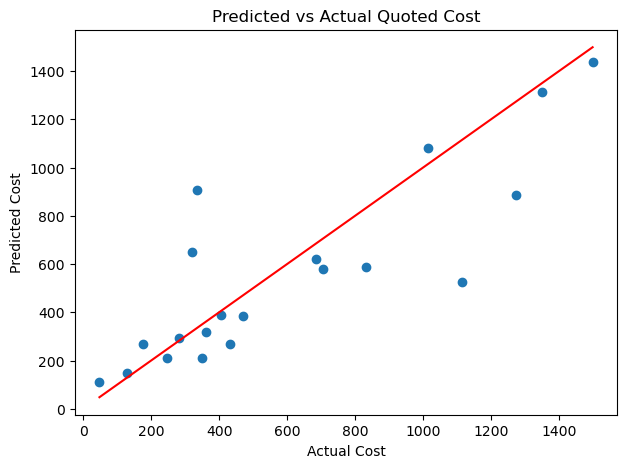

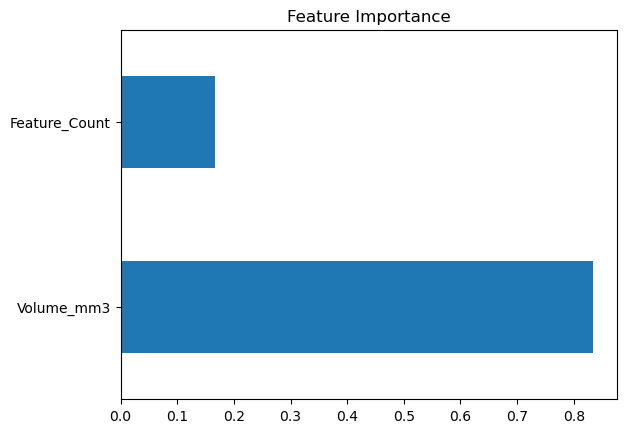

In [29]:
## Model Training

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Choose target: Quoted_Cost
X = df[['Volume_mm3', 'Feature_Count']]
y = df['Quoted_Cost']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Quoted Cost")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.plot(kind='barh', title='Feature Importance')
plt.show()

In [30]:
## Final Analysis & Reflection

print("Reflection:")
print("1. The model performs reasonably well with Volume and Feature Count.")
print("2. Volume and Feature Count are the most important predictors.")
print("3. Adding material hardness or tolerance requirements might improve accuracy.")
print("4. Scraping more data or integrating CAD-level info would enhance results.")


Reflection:
1. The model performs reasonably well with Volume and Feature Count.
2. Volume and Feature Count are the most important predictors.
3. Adding material hardness or tolerance requirements might improve accuracy.
4. Scraping more data or integrating CAD-level info would enhance results.
